# 手寫阿拉伯數字辨識 完整版

## 步驟1：載入 MNIST 手寫阿拉伯數字資料

In [13]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

# 載入 MNIST 手寫阿拉伯數字資料
(x_train, y_train),(x_test, y_test) = mnist.load_data()

# 訓練/測試資料的 X/y 維度
print(x_train.shape, y_train.shape,x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [14]:
# 訓練資料前10筆圖片的數字
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [15]:
# 顯示第1張圖片內含值
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [16]:
# 將非0的數字轉為1，顯示第1張圖片
data = x_train[0].copy()
data[data>0]=1

# 將轉換後二維內容顯示出來，隱約可以看出數字為 5
text_image=[]
for i in range(data.shape[0]):
    text_image.append(''.join(data[i].astype(str)))
text_image

['0000000000000000000000000000',
 '0000000000000000000000000000',
 '0000000000000000000000000000',
 '0000000000000000000000000000',
 '0000000000000000000000000000',
 '0000000000001111111111110000',
 '0000000011111111111111110000',
 '0000000111111111111111100000',
 '0000000111111111110000000000',
 '0000000011111110110000000000',
 '0000000001111100000000000000',
 '0000000000011110000000000000',
 '0000000000011110000000000000',
 '0000000000001111110000000000',
 '0000000000000111111000000000',
 '0000000000000011111100000000',
 '0000000000000001111100000000',
 '0000000000000000011110000000',
 '0000000000000011111110000000',
 '0000000000001111111100000000',
 '0000000000111111111000000000',
 '0000000011111111110000000000',
 '0000001111111111000000000000',
 '0000111111111100000000000000',
 '0000111111110000000000000000',
 '0000000000000000000000000000',
 '0000000000000000000000000000',
 '0000000000000000000000000000']

In [17]:
data.shape[0]

28

In [18]:
# 將非0的數字轉為1，顯示第2張圖片
data = x_train[1].copy()
data[data>0]=1

# 將轉換後二維內容顯示出來，隱約可以看出數字為 0
text_image=[]
for i in range(data.shape[0]):
    text_image.append(''.join(data[i].astype(str)))
text_image

['0000000000000000000000000000',
 '0000000000000000000000000000',
 '0000000000000000000000000000',
 '0000000000000000000000000000',
 '0000000000000001111100000000',
 '0000000000000011111100000000',
 '0000000000000111111111000000',
 '0000000000011111111111000000',
 '0000000000011111111111000000',
 '0000000000111111111111000000',
 '0000000001111111110011100000',
 '0000000011111100000011100000',
 '0000000111111100000011100000',
 '0000000111100000000011100000',
 '0000000111000000000011100000',
 '0000001111000000000011100000',
 '0000001111000000001111100000',
 '0000001110000000011111000000',
 '0000001110000000111100000000',
 '0000001110000001111000000000',
 '0000001111111111111000000000',
 '0000001111111111100000000000',
 '0000001111111110000000000000',
 '0000000111111100000000000000',
 '0000000000000000000000000000',
 '0000000000000000000000000000',
 '0000000000000000000000000000',
 '0000000000000000000000000000']

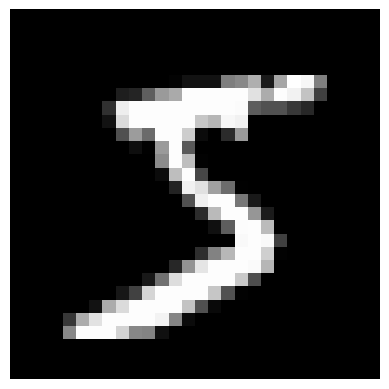

In [19]:
# 顯示第1張圖片圖像
import matplotlib.pyplot as plt

# 第一筆資料
X2 = x_train[0,:,:]

# 繪製點陣圖，cmap='gray':灰階
plt.imshow(X2.reshape(28,28), cmap='gray')

# 隱藏刻度
plt.axis('off') 

# 顯示圖形
plt.show() 

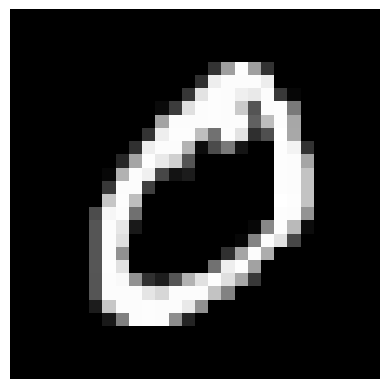

In [20]:
# 顯示第1張圖片圖像
import matplotlib.pyplot as plt

# 第一筆資料
X2 = x_train[1,:,:]

# 繪製點陣圖，cmap='gray':灰階
plt.imshow(X2.reshape(28,28), cmap='gray')

# 隱藏刻度
plt.axis('off') 

# 顯示圖形
plt.show() 

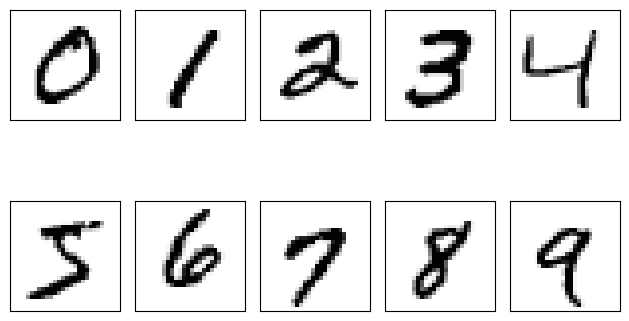

In [21]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(10):
    img = x_train[y_train == i][0].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
# plt.savefig('images/12_5.png', dpi=300)
plt.show()

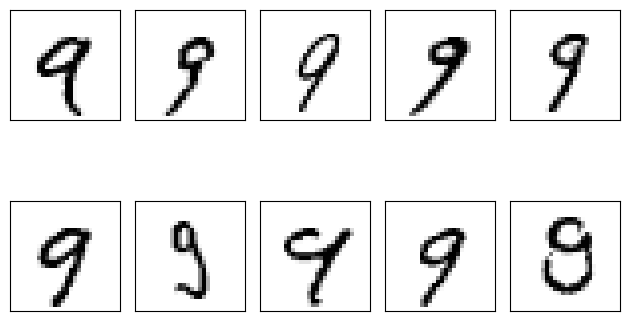

In [22]:
no=9
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(10):
    img = x_train[y_train == no][i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
# plt.savefig('images/12_5.png', dpi=300)
plt.show()

## 步驟2：資料清理，此步驟無需進行

## 步驟3：進行特徵工程，將特徵縮放成(0, 1)之間

In [23]:
# 特徵縮放，使用常態化(Normalization)，公式 = (x - min) / (max - min)
# 顏色範圍：0~255，所以，公式簡化為 x / 255
# 注意，顏色0為白色，與RGB顏色不同，(0,0,0) 為黑色。
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0
x_train_norm[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

## 步驟4：資料分割，此步驟無需進行，載入MNIST資料時，已經切割好了

## 步驟5：建立模型結構

In [24]:
# 建立模型
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
#最後要辨識0~9 所以設定10
  tf.keras.layers.Dense(10, activation='softmax')
])

In [25]:
# 設定優化器(optimizer)、損失函數(loss)、效能衡量指標(metrics)的類別
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## 步驟6：結合訓練資料及模型，進行模型訓練

In [26]:
# 模型訓練
# callback: https://ithelp.ithome.com.tw/articles/10234641
# 自訂 callback: https://ithelp.ithome.com.tw/articles/10235293
history = model.fit(x_train_norm, y_train, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3314 - accuracy: 0.9033 - val_loss: 0.1577 - val_accuracy: 0.9565
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1589 - accuracy: 0.9539 - val_loss: 0.1122 - val_accuracy: 0.9679
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1167 - accuracy: 0.9652 - val_loss: 0.0992 - val_accuracy: 0.9696
Epoch 4/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0953 - accuracy: 0.9706 - val_loss: 0.0962 - val_accuracy: 0.9712
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0795 - accuracy: 0.9749 - val_loss: 0.0876 - val_accuracy: 0.9748


In [27]:
# 檢查 history 所有鍵值
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

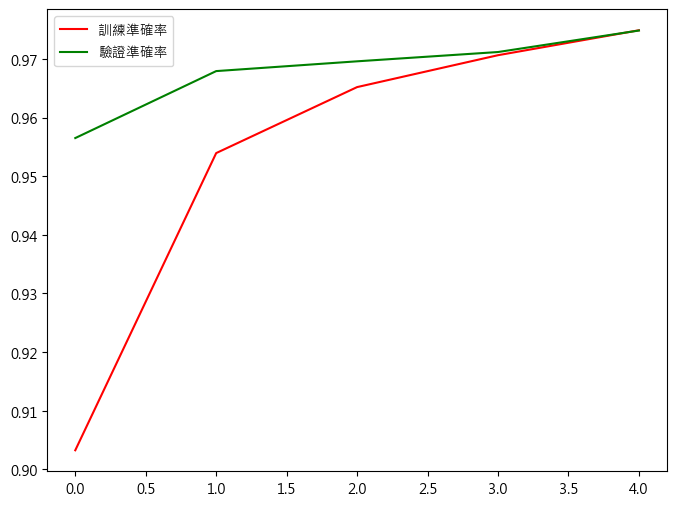

In [28]:
# 對訓練過程的準確率繪圖
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], 'r', label='訓練準確率')
plt.plot(history.history['val_accuracy'], 'g', label='驗證準確率')
plt.legend()

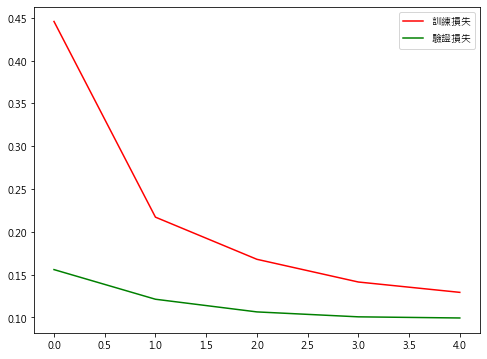

In [42]:
# 對訓練過程的損失繪圖
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], 'r', label='訓練損失')
plt.plot(history.history['val_loss'], 'g', label='驗證損失')
plt.legend()

## 步驟7：評分(Score Model)

In [29]:
# 評分(Score Model)
score=model.evaluate(x_test_norm, y_test, verbose=0)

for i, x in enumerate(score):
    print(f'{model.metrics_names[i]}: {score[i]:.4f}')

loss: 0.0793
accuracy: 0.9762


In [40]:
# 實際預測 20 筆資料
# predictions = model.predict_classes(x_test_norm)
import numpy as np
predictions = np.argmax(model.predict(x_test_norm), axis=-1)

# 比對
print('actual    :', y_test[0:20])
print('prediction:', predictions[0:20])

313/313 [==============================] - 0s 1ms/step
actual    : [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
prediction: [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


In [41]:
# 顯示第 9 筆的機率
import numpy as np

predictions = model.predict(x_test_norm[8:9])
print(f'0~9預測機率: {np.around(predictions, 2)}')

1/1 [==============================] - 0s 22ms/step
0~9預測機率: [[0.   0.   0.02 0.   0.   0.79 0.18 0.   0.01 0.  ]]


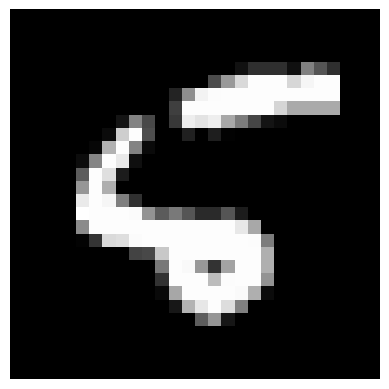

In [32]:
# 顯示第 9 筆圖像
X2 = x_test[8,:,:]
plt.imshow(X2.reshape(28,28), cmap='gray')
plt.axis('off')
plt.show() 

## 步驟8：評估，暫不進行

## 步驟9：模型佈署

In [58]:
# 模型存檔
# model.save('model.h5')
model.save('my_model.keras')

# 模型載入
# model = tf.keras.models.load_model('model.h5')
model = tf.keras.models.load_model('my_model.keras')

## 步驟10：新資料預測

In [51]:
# 使用小畫家，繪製 0~9，實際測試看看
from skimage import io
from skimage.transform import resize
import numpy as np

# 讀取影像並轉為單色
uploaded_file = './myDigits/8.png'
image1 = io.imread(uploaded_file, as_gray=True)
print(image1.shape)

# 縮為 (28, 28) 大小的影像
image_resized = resize(image1, (28, 28), anti_aliasing=True)    
X1 = image_resized.reshape(1,28, 28) #/ 255

# 反轉顏色，顏色0為白色，與 RGB 色碼不同，它的 0 為黑色
X1 = np.abs(1-X1)

# 預測
#predictions = model.predict_classes(X1)
predictions = np.argmax(model.predict(X1), axis=-1)
print(predictions)

(280, 280)
1/1 [==============================] - 0s 22ms/step
[8]


In [52]:
np.sum(model.predict(X1))

1/1 [==============================] - 0s 23ms/step


0.99999994

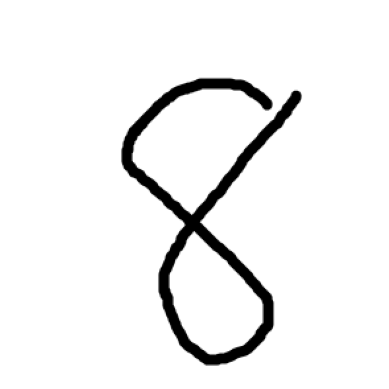

In [55]:
# 繪製點陣圖，cmap='gray':灰階
plt.imshow(image1, cmap='gray')

# 隱藏刻度
plt.axis('off') 

# 顯示圖形
plt.show() 

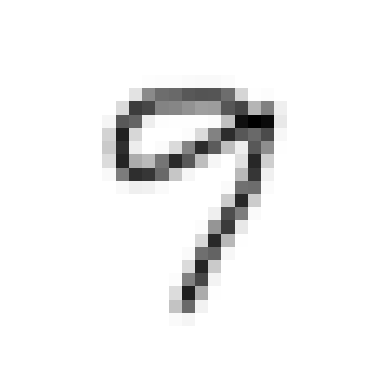

In [45]:
# 繪製點陣圖，cmap='gray':灰階
plt.imshow(image_resized, cmap='gray')

# 隱藏刻度
plt.axis('off') 

# 顯示圖形
plt.show() 

In [48]:
# 讀取影像並轉為單色
for i in range(10):
    uploaded_file = f'./myDigits/{i}.png'
    image1 = io.imread(uploaded_file, as_gray=True)

    # 縮為 (28, 28) 大小的影像
    image_resized = resize(image1, (28, 28), anti_aliasing=True)    
    X1 = image_resized.reshape(1,28, 28) #/ 255

    # 反轉顏色，顏色0為白色，與 RGB 色碼不同，它的 0 為黑色
    X1 = np.abs(1-X1)

    # 預測
    #predictions = model.predict_classes(X1)
    predictions = np.argmax(model.predict(X1), axis=-1)
    print(predictions)

1/1 [==============================] - 0s 22ms/step
[0]
1/1 [==============================] - 0s 21ms/step
[1]
1/1 [==============================] - 0s 20ms/step
[2]
1/1 [==============================] - 0s 23ms/step
[5]
1/1 [==============================] - 0s 23ms/step
[4]
1/1 [==============================] - 0s 24ms/step
[5]
1/1 [==============================] - 0s 24ms/step
[6]
1/1 [==============================] - 0s 23ms/step
[7]
1/1 [==============================] - 0s 20ms/step
[8]
1/1 [==============================] - 0s 23ms/step
[7]


## 其他：顯示模型彙總資訊(summary)、繪製圖形顯示模型結構

In [47]:
# 顯示模型的彙總資訊
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [56]:
import pandas as pd 
predictions = np.argmax(model.predict(x_test_norm), axis=-1)
pd.crosstab(y_test, predictions, rownames=['實際值'], colnames=['預測值'])

313/313 [==============================] - 0s 1ms/step


預測值,0,1,2,3,4,5,6,7,8,9
實際值,,,,,,,,,,
0,968,0,1,1,1,2,3,1,1,2
1,0,1126,4,0,0,0,2,0,3,0
2,3,2,1015,0,2,0,2,7,1,0
3,1,0,9,979,0,9,0,7,4,1
4,2,0,5,1,964,0,4,2,1,3
5,2,0,1,6,1,872,3,0,5,2
6,5,3,1,1,4,7,934,1,2,0
7,0,5,13,5,1,0,0,995,1,8
8,3,1,3,9,5,4,1,6,940,2


In [ ]:
## 作業英文字母辨識
## 做圖片~上傳來辨識 寫10個數字